In [1]:
%cd ../..
%load_ext autoreload
%autoreload 2

/Users/lior/git/research/gatelevel


In [2]:
import matplotlib.pyplot as plt
from IPython.display import clear_output

#Import Qiskit classes
import qiskit
from qiskit import assemble, transpile
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise.errors.standard_errors import depolarizing_error, thermal_relaxation_error
from qiskit.test.mock import FakeOpenPulse2Q
#Import the qv function
import qiskit.ignis.verification.quantum_volume as qv
from qiskit.circuit.library import QuantumVolume

from gatelevel_qiskit.circuit_to_qua import CircuitQuaTransformer
from gatelevel_qiskit.lib import wfs_no_samples, summary_of_inst, get_min_time
from gatelevel_qiskit.simple_backend import simple_backend
from qv_config import config_base

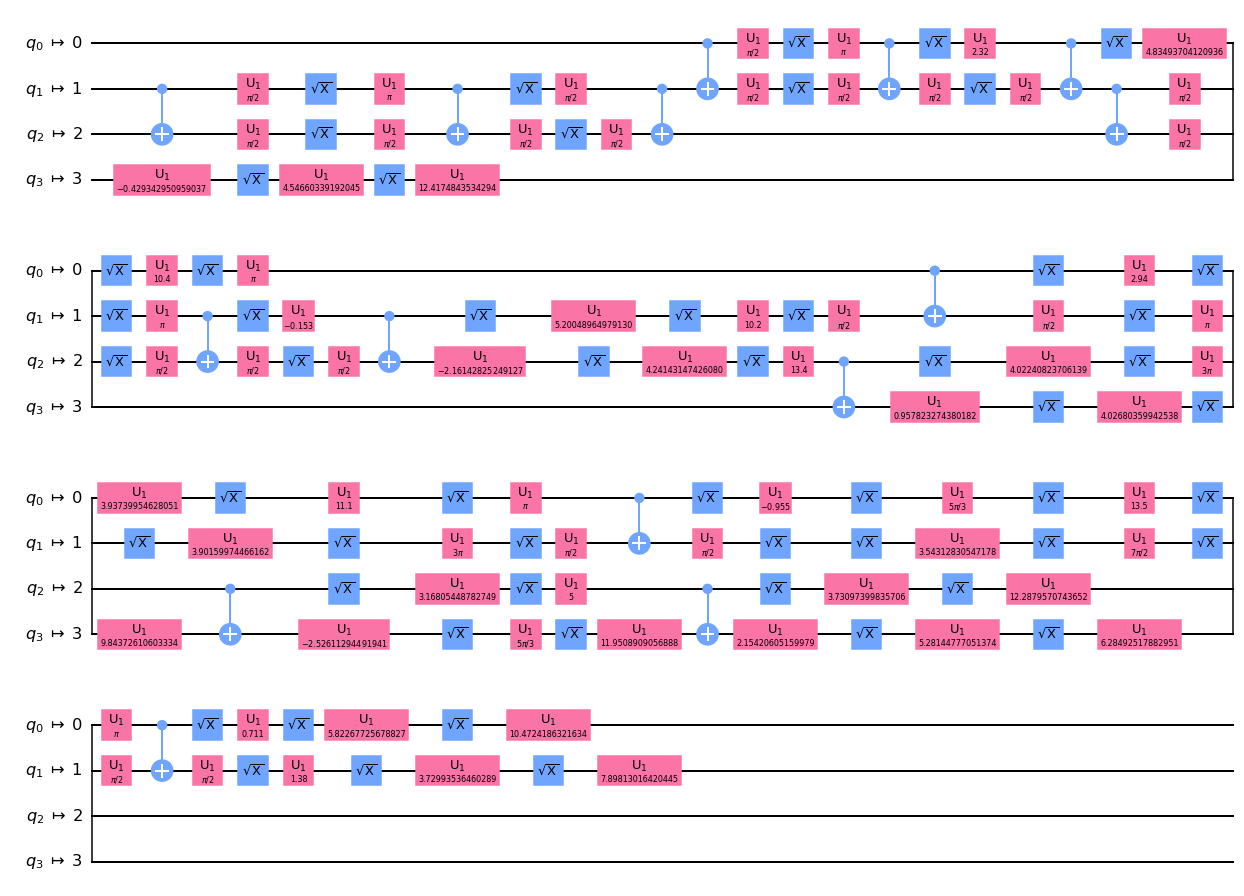

In [3]:
num_qubits = 4
coupling_map = [[0, 1], [1, 2], [2, 3]]
qvc = QuantumVolume(4, depth=1, classical_permutation=False);

qcvt = qiskit.compiler.transpile(qvc,
                          basis_gates=['u1', 'sx', 'cx'],
                          coupling_map=coupling_map,
                                optimization_level=2
                            )
qcvt.draw('mpl')

In [4]:
circ_qua = CircuitQuaTransformer(pulse_backend=simple_backend,
                                config_base=config_base,
                                circuit=qcvt)

In [5]:
print(qcvt.qasm())

OPENQASM 2.0;
include "qelib1.inc";
qreg q[4];
cx q[1],q[2];
u1(pi/2) q[1];
sx q[1];
u1(pi) q[1];
u1(pi/2) q[2];
sx q[2];
u1(pi/2) q[2];
cx q[1],q[2];
sx q[1];
u1(pi/2) q[1];
u1(pi/2) q[2];
sx q[2];
u1(pi/2) q[2];
cx q[1],q[2];
cx q[0],q[1];
u1(pi/2) q[0];
sx q[0];
u1(pi) q[0];
u1(pi/2) q[1];
sx q[1];
u1(pi/2) q[1];
cx q[0],q[1];
sx q[0];
u1(2.3201621) q[0];
u1(pi/2) q[1];
sx q[1];
u1(pi/2) q[1];
cx q[0],q[1];
sx q[0];
u1(4.83493704120936) q[0];
sx q[0];
u1(10.428587) q[0];
sx q[0];
u1(pi) q[0];
cx q[1],q[2];
u1(pi/2) q[1];
sx q[1];
u1(pi) q[1];
u1(pi/2) q[2];
sx q[2];
u1(pi/2) q[2];
cx q[1],q[2];
sx q[1];
u1(-0.15264626) q[1];
u1(pi/2) q[2];
sx q[2];
u1(pi/2) q[2];
cx q[1],q[2];
sx q[1];
u1(5.20048964979130) q[1];
sx q[1];
u1(10.226885) q[1];
sx q[1];
u1(pi/2) q[1];
cx q[0],q[1];
sx q[0];
u1(2.9382462) q[0];
sx q[0];
u1(3.93739954628051) q[0];
sx q[0];
u1(11.138863) q[0];
sx q[0];
u1(pi) q[0];
u1(pi/2) q[1];
sx q[1];
u1(pi) q[1];
sx q[1];
u1(3.90159974466162) q[1];
sx q[1];
u1(3*pi) q

In [6]:
print(circ_qua.to_qua())

with program() as prog:
    I = [None] * 0
    align(*['d1', 'u2', 'd2', 'u1', 'd0', 'u0', 'd3', 'u3'])
    frame_rotation(1.5707963267948966, 'd1')
    frame_rotation(1.5707963267948966, 'u2')
    play('Ym_d0', 'd1')
    play('X90p_d1', 'd2')
    play('CR90p_d1_u0', 'd2')
    wait(5,'u1')
    play('CR90p_u0', 'u1')
    wait(16,'d1')
    play('Xp_d0', 'd1')
    wait(5,'d2')
    play('CR90m_d1_u0', 'd2')
    wait(5,'u1')
    play('CR90m_u0', 'u1')
    frame_rotation(1.5707963267949, 'd1')
    frame_rotation(1.5707963267949, 'd2')
    wait(16,'d1')
    play('wf_sx', 'd1')
    play('wf_sx', 'd2')
    frame_rotation(3.14159265358979, 'd1')
    frame_rotation(1.5707963267948966, 'd1')
    frame_rotation(1.5707963267949, 'd2')
    frame_rotation(1.5707963267948966, 'u2')
    play('Ym_d0', 'd1')
    play('X90p_d1', 'd2')
    play('CR90p_d1_u0', 'd2')
    wait(10,'u1')
    play('CR90p_u0', 'u1')
    wait(16,'d1')
    play('Xp_d0', 'd1')
    wait(5,'d2')
    play('CR90m_d1_u0', 'd2')
    wait(5